Simple testing for GPFlowOpt library for Bayesian Optimization

In [97]:
#Attempt using Bayesian Optimization
# Use the new MOBOpt library
import mobopt as mo
import numpy as np
import pandas as pd

import plotly.express as px

In [113]:
def f1(x):
    y=x[0]+x[1]
    return y

def f2(x):
    z=1/(x[0]+x[1]+1)
    return z

def objective(x):
    """ Objective functions to be optimized

    Input: x --> 1-D np.array with NParam elements
    """
    ...
    return np.array([f1(x), f2(x)])

In [188]:
NObj=2
minmax=np.zeros((2,2))
minmax[1][1]=1
minmax[0][1]=1
minmax

array([[0., 1.],
       [0., 1.]])

In [236]:
N_init=2
Optimizer = mo.MOBayesianOpt(target=objective,
                             NObj=NObj,
                             pbounds=minmax,
                            max_or_min='min')
Optimizer.initialize(init_points=N_init)

In [237]:
NIter=10
front, pop = Optimizer.maximize(n_iter=NIter,
                               prob=.7,
                               ReduceProb=True,
                               q=0.5)

In [238]:
Optimizer.x_Pareto
results=pd.DataFrame(Optimizer.x_Pareto)
results['obj1']=Optimizer.y_Pareto[:,0]*-1
results['obj2']=Optimizer.y_Pareto[:,1]*-1
results_true=results
results_true

0             1          obj1      obj2
0   4.202166e-01  4.387566e-02  4.640923e-01  0.683017
1   6.236957e-01  6.395901e-02  6.876547e-01  0.592538
2   5.586725e-01  1.000000e+00  1.558673e+00  0.390828
3   4.911727e-01  3.077578e-01  7.989305e-01  0.555886
4   4.548213e-01  3.186983e-01  7.735196e-01  0.563851
5   9.912233e-01  2.691720e-01  1.260395e+00  0.442400
6   1.000000e+00  9.999969e-01  1.999997e+00  0.333334
7   8.017396e-01  9.502532e-01  1.751993e+00  0.363373
8   9.018310e-01  1.450809e-01  1.046912e+00  0.488541
9   9.000710e-01  9.791273e-01  1.879198e+00  0.347319
10  4.959260e-10  3.463882e-12  4.993899e-10  1.000000
11  2.179083e-01  6.963204e-03  2.248715e-01  0.816412

In [239]:
results=pd.DataFrame(pop)
results['obj1']=front[:,0]
results['obj2']=front[:,1]
results_gp=results
results_gp

0             1          obj1      obj2
0   1.000000e+00  1.000000e+00  2.000000e+00  0.333333
1   1.000000e+00  1.000000e+00  2.000000e+00  0.333333
2   2.013270e-08  2.736184e-08  4.339469e-08  1.000000
3   5.373605e-01  6.042960e-02  5.979565e-01  0.624609
4   5.097650e-01  3.244906e-02  5.434892e-01  0.646228
..           ...           ...           ...       ...
95  3.372050e-01  2.503229e-02  3.607321e-01  0.739259
96  8.841521e-01  9.995517e-01  1.880863e+00  0.346503
97  2.544134e-01  3.648671e-03  2.549165e-01  0.805443
98  5.372773e-01  4.954078e-01  1.039475e+00  0.489100
99  6.228070e-01  8.903392e-01  1.519570e+00  0.396540

[100 rows x 4 columns]

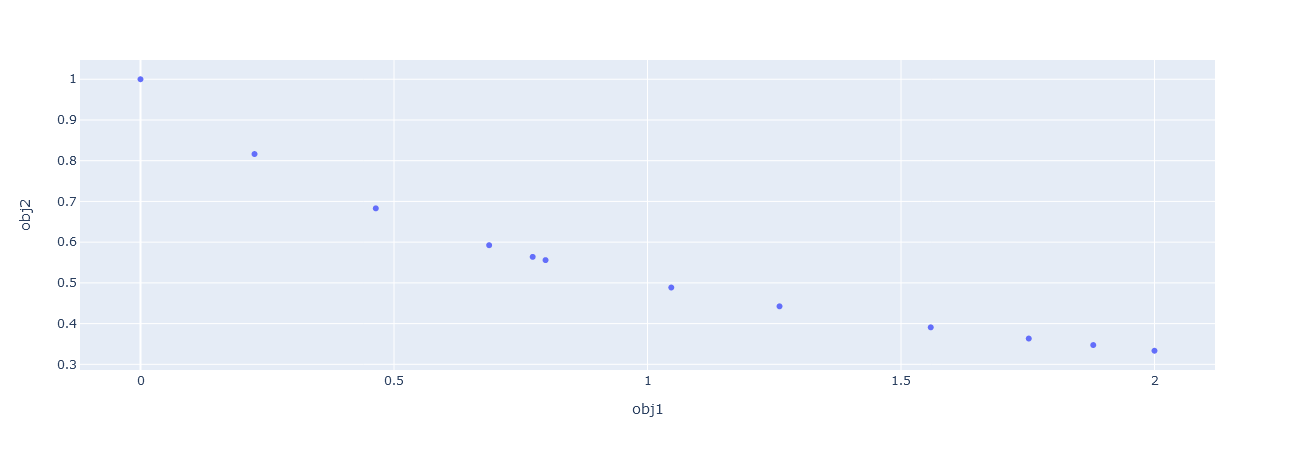

In [240]:
px.scatter(data_frame=results_true,x='obj1',y='obj2')

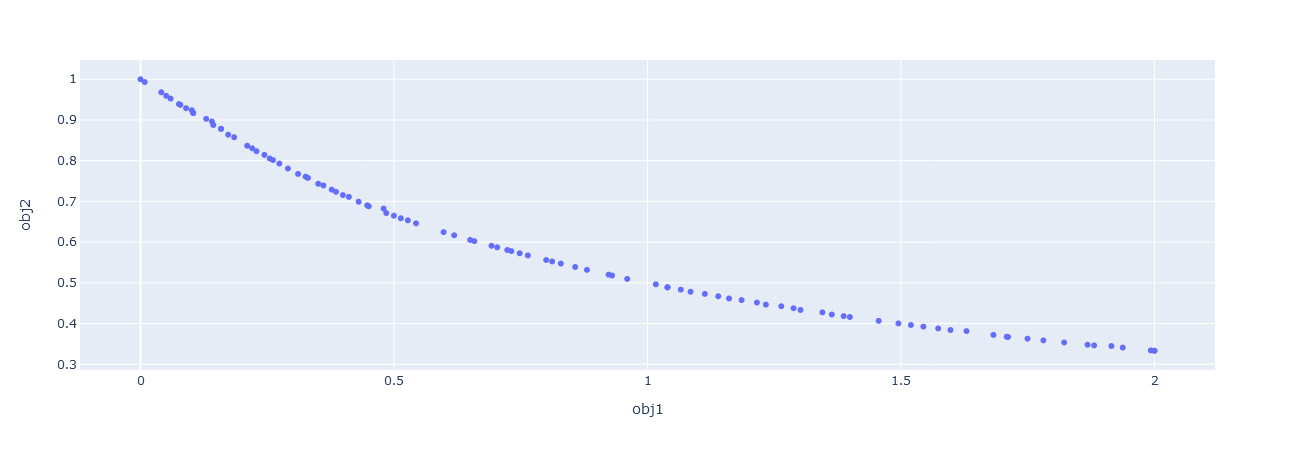

In [241]:
px.scatter(data_frame=results_gp,x='obj1',y='obj2')

In [120]:
# %%time
# init_pts=3
# points=sampling.dist_sampler(sampling.lhs, problem, num_samples=init_pts)
# init_obs=evaluator_gen.df_apply(points, processes=1)
# points=np.asarray(points)
# init_obs=np.asarray(init_obs)

In [ ]:



# Optimizer = mo.MOBayesianOpt(target=evaluator_gen,
#                 NObj=NObj,pbounds=minmax)

In [ ]:
# %%time
# Optimizer.initialize(init_points=init_pts,Points=points,Y=init_obs)

In [ ]:
# %%time
# front, pop = Optimizer.maximize(n_iter=NIter,prob=0.5,n_pts=12)